# 0. CONTEXTO DEL DATASET

Este dataset está creado sintéticamente pero siendo realista para analizar y hacer previsiones para tiendas minoristas de la misma marca. Contiene 73000 filas.

Se puede conseguir en https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset


Las columnas que tiene este dataset son las siguientes:
- date: fecha
- store id: identifica a las tiendas.
- product id: identifica el producto.
- category: identifica categorías del producto.
- region: identifica la region donde está la tienda.
- inventory level: indica el stock disponible al principio del día.
- units sold: indica las unidades vendidas durante el día.
- units ordered: indica las unidades pedidas.
- demand forecast: indica la demanda prevista basada en patrones antiguos.
- price: indica el precio del producto.
- discount: indica si el producto tiene descuento.
- weather condition: indica el tiempo de ese día
- holiday/promotion: indica si es festivo o tiene promociones.
- competitor pricing: indica el precio de una tienda competidora.
- seasonality: indica la estación del año.

#1. SE IMPORTAN LAS LIBRERÍAS NECESARIAS

In [6]:
# Instalación sileciosa (sin output) de missingno
%%capture
!pip install missingno

#Importamos librerías esenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import plotly as pl # Para visualizaciones interactivas
import seaborn as sns # Para gráficos estadísticos
import matplotlib.pyplot as plt #Para visualizaciones
import missingno as msno # Para visualizar datos faltantes
import statsmodels.formula.api as smf #Para estadística

from google.colab import files #Para exportar archivos

#2. SE CARGA EL DATASET

In [7]:
df=pd.read_csv('retail_store_inventory.csv')

In [8]:
#Nos aseguramos de que sea un dataframe.
df=pd.DataFrame(df)

#3. LIMPIEZA

##3.1. DATA OVERVIEW

In [9]:
df.shape

(73100, 15)

In [10]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [11]:
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [13]:
#Para evitar errores o pérdida de información original se crea una copia.
df_train_copy =df.copy()

## 3.2. DUPLICADOS Y NULOS

In [14]:
#Buscamos duplicados.
df_train_copy.duplicated().sum()

np.int64(0)

No hay duplicados.


In [15]:
#Se cuentan nulos de cada columna.
missing = df_train_copy.isna().sum().sort_values(ascending=False)
print(missing)

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


No hay valores nulos.

<Axes: >

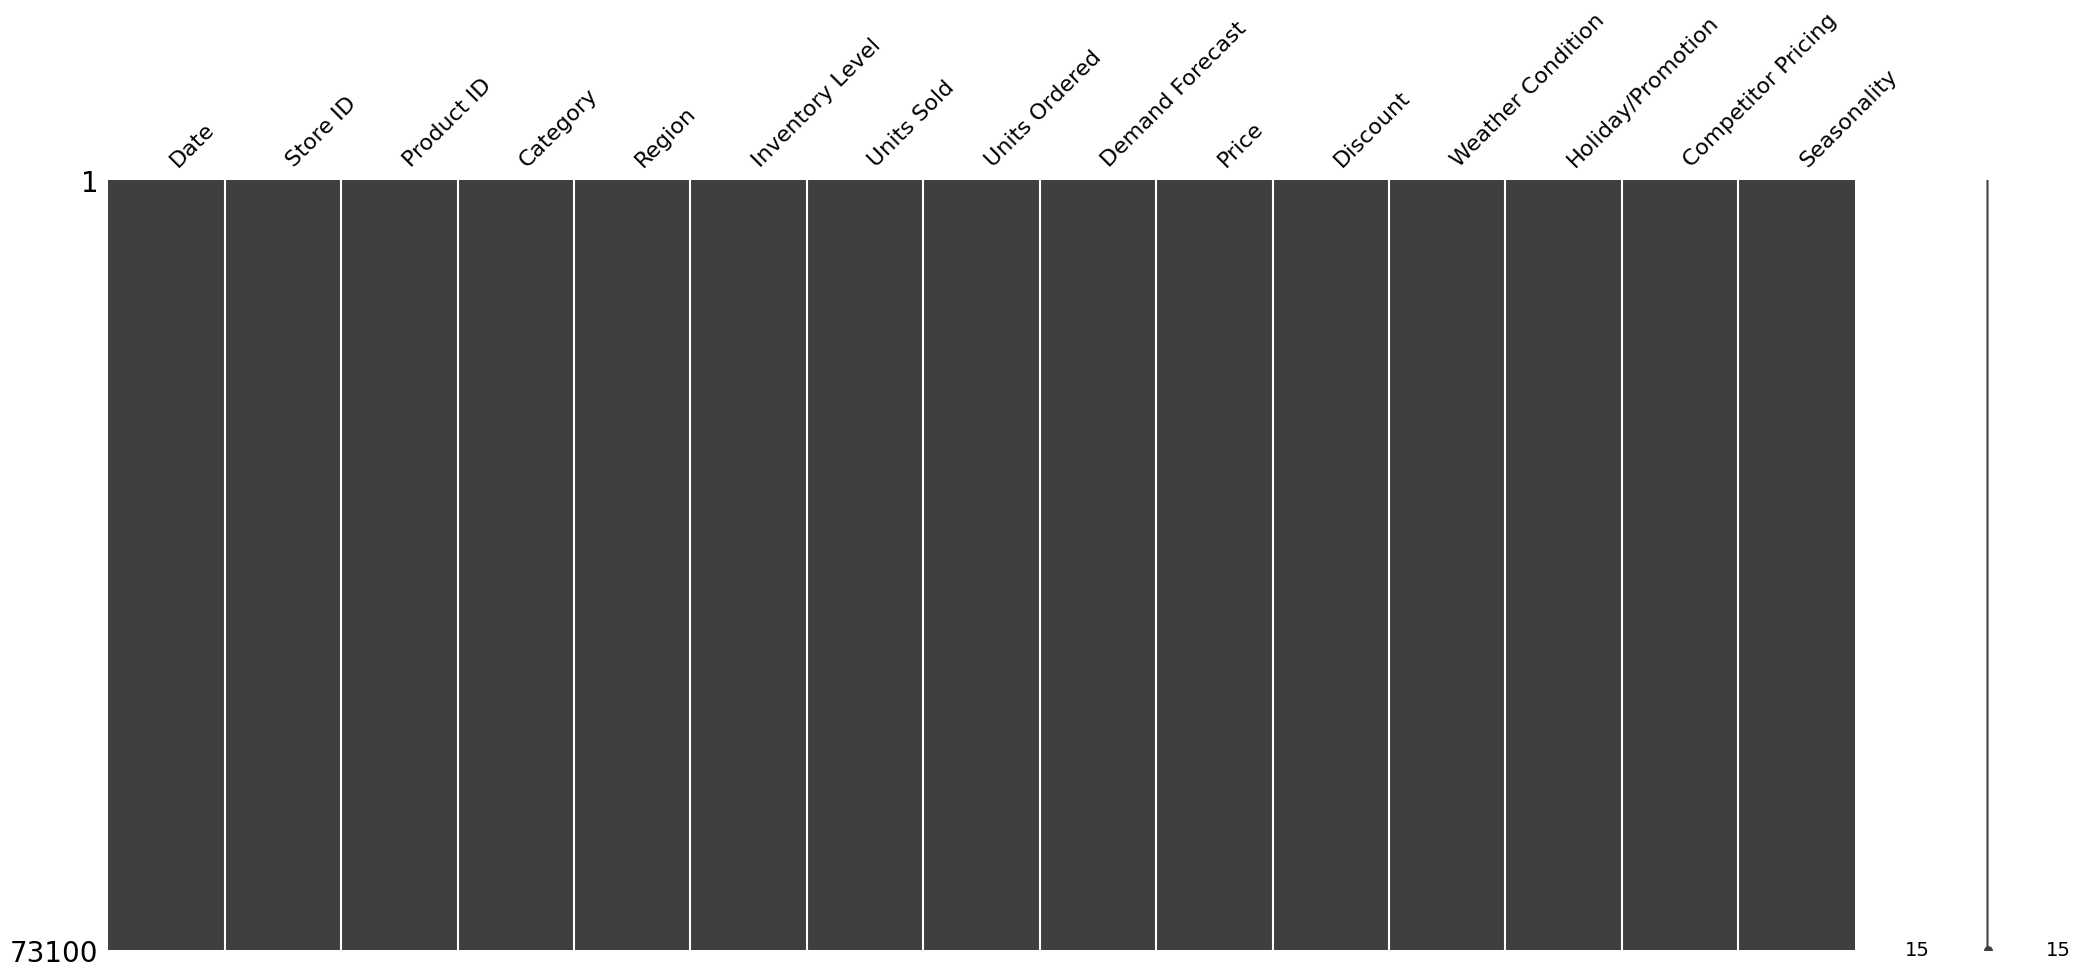

In [16]:
#Otras formas de ver los valores nulos.
msno.matrix(df_train_copy)

In [17]:
#Se miran algunos valores únicos.
valores_storeID = df_train_copy['Store ID'].value_counts()
display (valores_storeID)

valores_category = df_train_copy['Category'].value_counts()
display (valores_category)

valores_region = df_train_copy['Region'].value_counts()
display (valores_region)

valores_weather = df_train_copy['Weather Condition'].value_counts()
display (valores_weather)

valores_season = df_train_copy['Seasonality'].value_counts()
display (valores_season)

,count
Store ID,
S001,14620
S002,14620
S003,14620
S004,14620
S005,14620


,count
Category,
Furniture,14699
Toys,14643
Clothing,14626
Groceries,14611
Electronics,14521


,count
Region,
East,18349
South,18297
North,18228
West,18226


,count
Weather Condition,
Sunny,18290
Rainy,18278
Snowy,18272
Cloudy,18260


,count
Seasonality,
Spring,18317
Summer,18305
Winter,18285
Autumn,18193


Es un dataset muy limpio.

##3.3. TIPADO DE COLUMNAS


In [18]:
#Se cambian las columnas de tipo object a string.
for col in df_train_copy.columns:
  if df_train_copy[col].dtype == 'object':
    df_train_copy[col] = df_train_copy[col].astype('string')


#Se comprueban los cambios
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  string 
 1   Store ID            73100 non-null  string 
 2   Product ID          73100 non-null  string 
 3   Category            73100 non-null  string 
 4   Region              73100 non-null  string 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  string 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  string 
dtypes: float64(3), int64(5), string(7)
memory usage: 8.4 

No cambiamos a minúsculas porque se ve que no hay valores que algunos estén en mayúsculas y otros en minúsculas.

## 3.4. OUTLIERS

In [19]:
#Se hacen boxplots para ver si hay outliers
cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing']

outliers_iqr = {}

for col in cols:
    Q1 = df_train_copy[col].quantile(0.25)
    Q3 = df_train_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_train_copy[(df_train_copy[col] < lower) | (df_train_copy[col] > upper)]
    outliers_iqr[col] = outliers

    print(f"\n Outliers en {col} (IQR): {len(outliers)} valores")
    print(outliers[[col]].head())


 Outliers en Inventory Level (IQR): 0 valores
Empty DataFrame
Columns: [Inventory Level]
Index: []

 Outliers en Units Sold (IQR): 715 valores
     Units Sold
102         464
138         479
195         437
322         448
554         476

 Outliers en Units Ordered (IQR): 0 valores
Empty DataFrame
Columns: [Units Ordered]
Index: []

 Outliers en Demand Forecast (IQR): 732 valores
     Demand Forecast
102           463.12
138           469.74
322           459.44
554           478.76
606           440.06

 Outliers en Price (IQR): 0 valores
Empty DataFrame
Columns: [Price]
Index: []

 Outliers en Discount (IQR): 0 valores
Empty DataFrame
Columns: [Discount]
Index: []

 Outliers en Holiday/Promotion (IQR): 0 valores
Empty DataFrame
Columns: [Holiday/Promotion]
Index: []

 Outliers en Competitor Pricing (IQR): 0 valores
Empty DataFrame
Columns: [Competitor Pricing]
Index: []


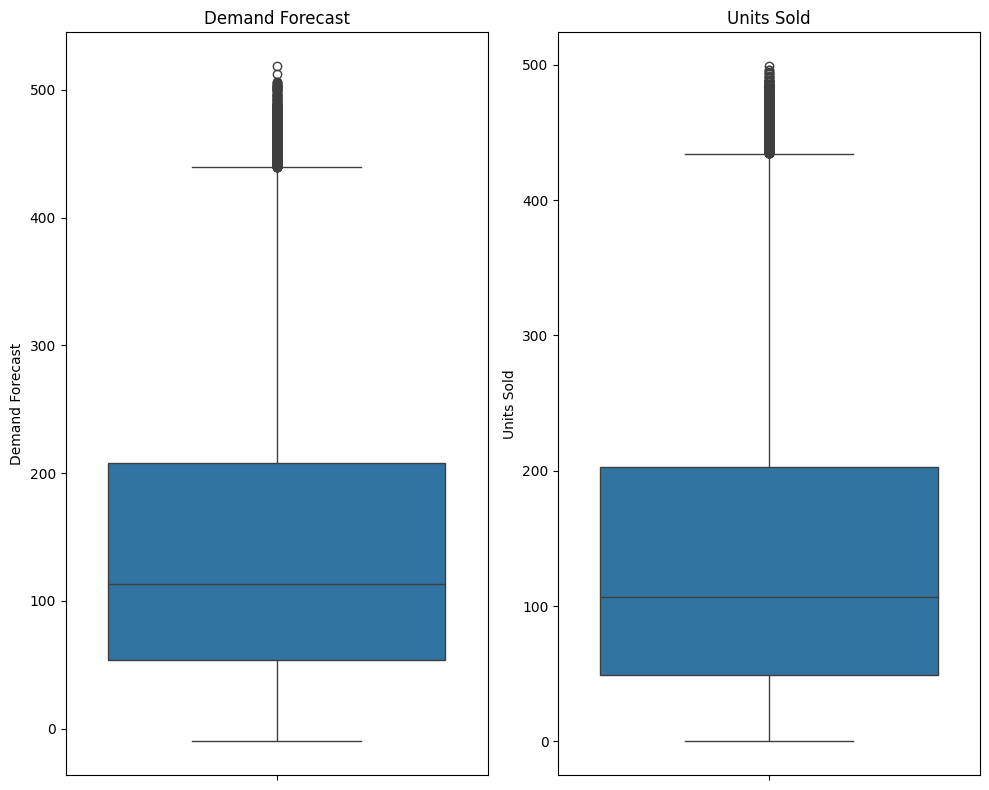

In [20]:
#Se hacen boxplots para observar los valores anómalos de 'Demand Forecast' y 'Units Sold'.
fig, axes = plt.subplots(1, 2, figsize=(10, 8)) #una fila y 2 columnas

# Boxplot de price (izquierda)
sns.boxplot(y=df_train_copy['Demand Forecast'], ax=axes[0])
axes[0].set_title('Demand Forecast')

# Boxplot de model_year (derecha)
sns.boxplot(y=df_train_copy['Units Sold'], ax=axes[1])
axes[1].set_title('Units Sold')

plt.tight_layout()
plt.show()

Tiene sentido que coincidan ambas columnas con valores parecidos de outliers porque la columna de Demand Forecast está basándose en las unidades vendidas.

Es algo lógico que haya productos que se vendan mucho más y por eso sean valores anómalos. Por lo que no se eliminarán.

##3.5. ESTADÍSTICA DESCRIPTIVA GENERAL

In [21]:
df_train_copy.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


# 4. EDA

## 4.1. EXPLORAMOS UN POCO MÁS LAS COLUMNAS CON OUTLIERS

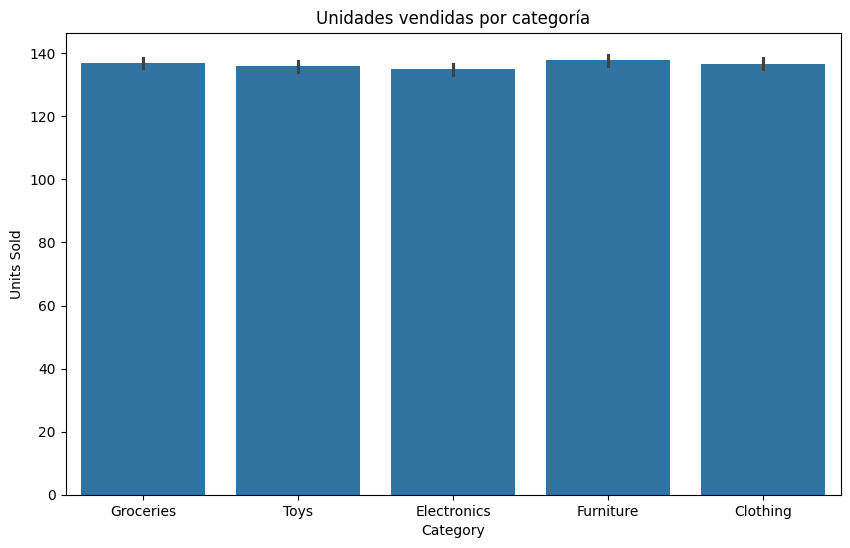

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train_copy, x='Category', y='Units Sold')

plt.title('Unidades vendidas por categoría')
plt.show()

Se han vendido casi la misma cantidad en cada categoría.

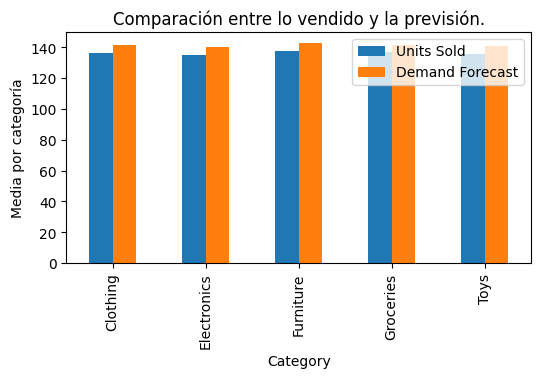

In [23]:
df_group = df_train_copy.groupby('Category')[['Units Sold', 'Demand Forecast']].mean()

df_group.plot(kind='bar', figsize=(6, 3))
plt.title('Comparación entre lo vendido y la previsión.')
plt.ylabel('Media por categoría')
plt.show()



Se observa que siempre se prevee un poco más de lo que se vende.

##4.2. HISTOGRAMAS

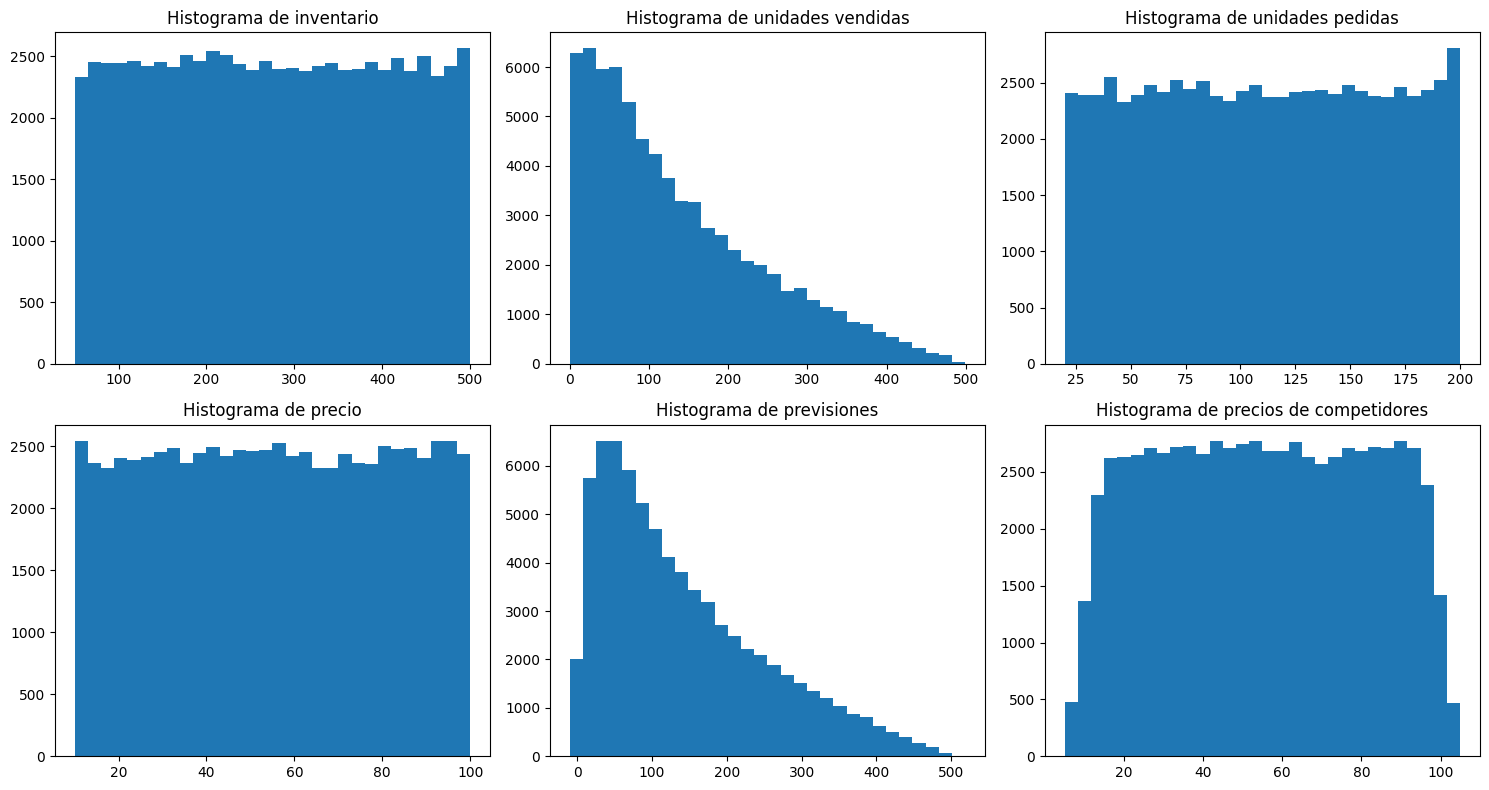

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8)) #3 filas y 3 columnas

# Fila 1
axes[0, 0].hist(df_train_copy['Inventory Level'], bins=30)
axes[0, 0].set_title('Histograma de inventario')

axes[0, 1].hist(df_train_copy['Units Sold'], bins=30)
axes[0, 1].set_title('Histograma de unidades vendidas')

axes[0, 2].hist(df_train_copy['Units Ordered'], bins=30)
axes[0, 2].set_title('Histograma de unidades pedidas')

# Fila 2
axes[1, 0].hist(df_train_copy['Price'], bins=30)
axes[1, 0].set_title('Histograma de precio')

axes[1, 1].hist(df_train_copy['Demand Forecast'], bins=30)
axes[1, 1].set_title('Histograma de previsiones')

axes[1, 2].hist(df_train_copy['Competitor Pricing'], bins=30)
axes[1, 2].set_title('Histograma de precios de competidores')

plt.tight_layout()
plt.show()

##4.3. MATRICES DE CORRELACIÓN Y SCATTERPLOTS

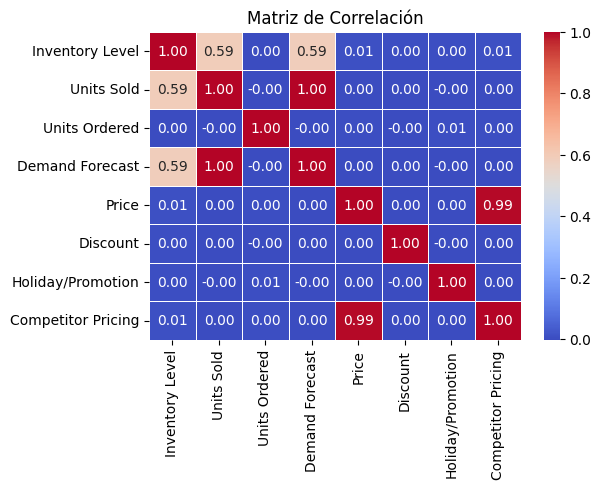

In [25]:
#Matriz de correlación para ver si hay correlaciones entre variables numéricas
corr_df = df_train_copy[['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing']]
corr_matrix = corr_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Las variables de precio y el precio de competidor tienen una relación lineal fuerte (1,00). Esto tiene sentido ya que si el competidor aumenta el precio, pues la tienda lo aumentará. También la tiene las unidades vendidas con la previsión de demanda (0,99), ya que a más unidades vendidas, la previsión será mayor. En cambio, es moderada la que tiene esta última con el nivel del inventario (0,59) y la del nivel del inventario con las unidades vendidas.

El resto no tienen correlación entre sí.


🔗 Correlación entre precio y precio de los competidores:
   Precio = 0.680 + 0.987 * Precio del competidor
Coeficiente de correlación de Pearson: 0.994
Interpretación: Correlación positiva alta.


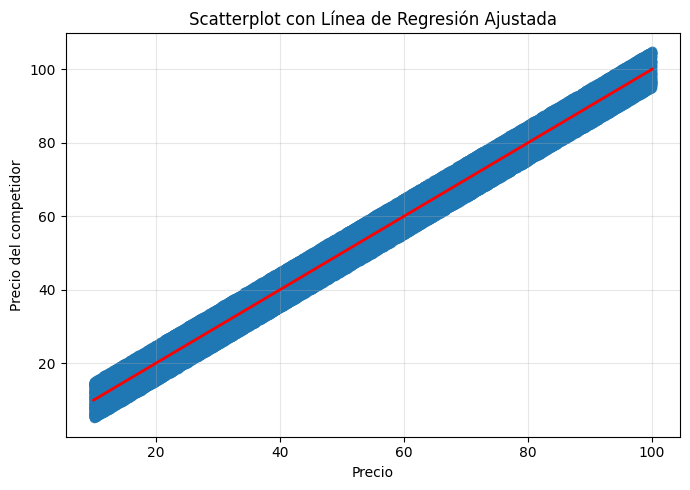

In [26]:
print("\n🔗 Correlación entre precio y precio de los competidores:")
correlation = df_train_copy['Price'].corr(df_train_copy['Competitor Pricing'])
#Modelo
modelo = smf.ols('Price ~ Q("Competitor Pricing")', data=df_train_copy).fit() #Porque tiene espacios Competitor Pricing

params = modelo.params
conf_int = modelo.conf_int()
intercepto = modelo.params['Intercept']
pendiente = modelo.params['Q("Competitor Pricing")']
print(f"   Precio = {intercepto:.3f} + {pendiente:.3f} * Precio del competidor")
print(f"Coeficiente de correlación de Pearson: {correlation:.3f}")
print("Interpretación: Correlación positiva alta.")

# Scatterplot básico
fig, ax = plt.subplots(1, 1, figsize=(7, 5))


# Scatterplot con regresión lineal visual (sólo visual)
sns.regplot(x='Price', y='Competitor Pricing', data=df_train_copy, ax=ax,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'linewidth':2})
ax.set_xlabel('Precio')
ax.set_ylabel('Precio del competidor')
ax.set_title('Scatterplot con Línea de Regresión Ajustada')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

La relación entre estas variables es fuertemente lineal, se demuestra con la matriz y el diagrama de dispersión. También tiene sentido la ecuación de la recta obtenida:

Precio = 0.680 + 0.987 * Precio del competidor


Se observa que los precios son muy parecidos entre la tienda objetivo y la competidora. Ya que si el precio del competidor fuera 0, el Precio de la tienda objetivo sería relativamente parecido a 0 (exactamente sería 0,680) y esto tiene sentido en la realidad (porque dentro de un margen los precios son muy parecidos) y con que su R^2 sea prácticamente 1. Es una relación lineal positiva muy fuerte.

# 5. EXPORTAR ARCHIVO

In [27]:
#Por último, se guarda el archivo y se exporta en formato csv.

df_train_copy.to_csv('limpieza_eda_pildora.csv', index=False)

#Por si se quiere descargar automáticamente, quitar # de la siguiente línea
#files.download('limpieza_eda_pildora.csv')